### Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
import os
import cv2 as cv
import imghdr
from IPython.display import Image

In [4]:
import tensorflow as tf
import keras

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

### Remove Dodgy Images

In [7]:
exts = ['jpeg', 'jpg', 'png', 'bmp']

In [8]:
data_dir = 'data' 

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path

Issue with image data\apples\img_p1_10.jpeg
Issue with image data\apples\img_p1_100.jpeg
Issue with image data\apples\img_p1_107.jpeg
Issue with image data\apples\img_p1_109.jpeg
Issue with image data\apples\img_p1_11.jpeg
Issue with image data\apples\img_p1_113.jpeg
Issue with image data\apples\img_p1_115.jpeg
Issue with image data\apples\img_p1_117.jpeg
Issue with image data\apples\img_p1_119.jpeg
Issue with image data\apples\img_p1_12.jpeg
Issue with image data\apples\img_p1_123.jpeg
Issue with image data\apples\img_p1_125.jpeg
Issue with image data\apples\img_p1_129.jpeg
Issue with image data\apples\img_p1_13.jpeg
Issue with image data\apples\img_p1_135.jpeg
Issue with image data\apples\img_p1_137.jpeg
Issue with image data\apples\img_p1_141.jpeg
Issue with image data\apples\img_p1_144.jpeg
Issue with image data\apples\img_p1_17.jpeg
Issue with image data\apples\img_p1_18.jpeg
Issue with image data\apples\img_p1_20.jpeg
Issue with image data\apples\img_p1_21.jpeg
Issue with image d

### Load Data

In [11]:
# Did this operation after putting Folders "Cats" and "Dogs" into the folder "Data"
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 294 files belonging to 2 classes.


In [12]:
data_next = data.as_numpy_iterator()
batch = data_next.next()

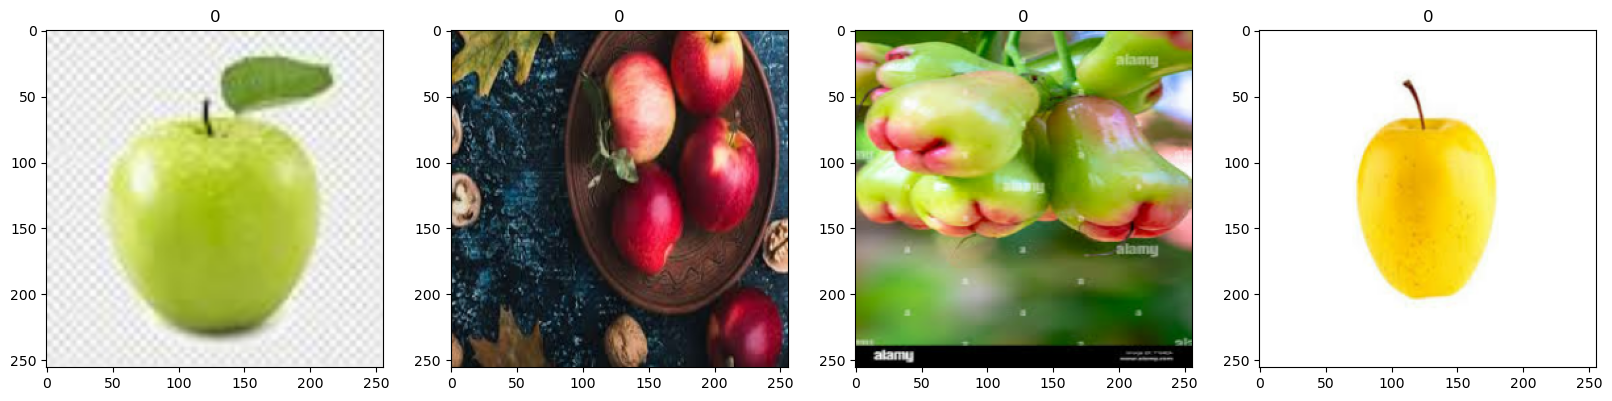

In [13]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scaling Data

In [15]:
data = data.map(lambda x,y : (x/255, y))
data.as_numpy_iterator().next

<bound method NumpyIterator.next of <tensorflow.python.data.ops.dataset_ops.NumpyIterator object at 0x000002CF9C20B450>>

### Split Data into Training, Validation and Testing Sets

In [17]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [18]:
print(train_size, val_size, test_size)

7 2 1


In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### Build CNN

In [21]:
model = Sequential()

model.add(Conv2D(24, (4,4), strides = (1,1), input_shape = (256, 256, 3)))
model.add(MaxPooling2D((4,4) , strides = (4,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (4,4), strides = (1,1), padding = 'valid'))
model.add(MaxPooling2D((4,4) , strides = (4,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (4,4), strides = (1,1), padding = 'valid'))
# model.add(MaxPooling2d((4,4) , strides = (4,2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate = 0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [22]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 24)      1176      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 125, 24)       0         
 D)                                                              
                                                                 
 activation (Activation)     (None, 63, 125, 24)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 122, 48)       18480     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 60, 48)        0         
 g2D)                                                            
                                                                 
 activation_1 (Activation)   (None, 15, 60, 48)        0

### Use Tensorboard Inline

In [25]:
logdir = 'logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

### Fit the Model

In [49]:
hist = model.fit(train, epochs = 10, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/10
7/7 [==============================] - 4s 551ms/step - loss: 0.2567 - accuracy: 0.9107 - val_loss: 0.1963 - val_accuracy: 0.9375
Epoch 2/10
7/7 [==============================] - 3s 330ms/step - loss: 0.1980 - accuracy: 0.9330 - val_loss: 0.0503 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 2s 307ms/step - loss: 0.1544 - accuracy: 0.9420 - val_loss: 0.0774 - val_accuracy: 0.9844
Epoch 4/10
7/7 [==============================] - 2s 306ms/step - loss: 0.1377 - accuracy: 0.9643 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 2s 311ms/step - loss: 0.0824 - accuracy: 0.9777 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 2s 313ms/step - loss: 0.0558 - accuracy: 0.9821 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 2s 300ms/step - loss: 0.0972 - accuracy: 0.9598 - val_loss: 0.0638 - val_accuracy: 0.9844
Epoch 8/10
7/7 [====

### Performance Graphs

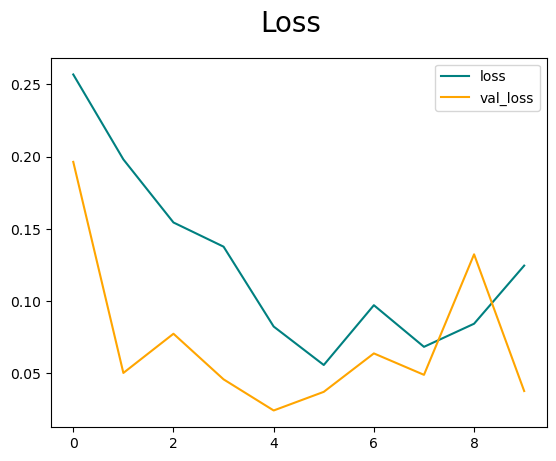

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper right')
plt.show();

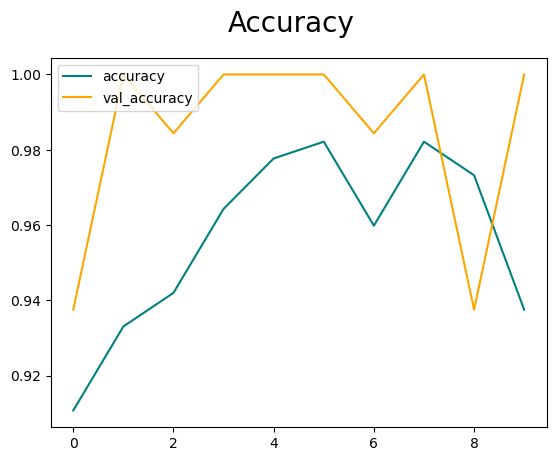

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show();

### Test With Random Images

In [ ]:
# img = cv.imread('TestingSet/fluffiest-dogs-ever-4589343-hero-939e88f02bae4cfdb557bb7c15ee5384.jpg')

In [ ]:
# plt.imshow(img);

In [ ]:
# resize_img = tf.image.resize(img, (256,256))

In [ ]:
# plt.imshow(resize_img.numpy().astype(int))
# plt.show();

In [ ]:
# pred = model.predict(np.expand_dims(resize_img/255, 0))

In [ ]:
# pred

In [ ]:
# if pred > 0.5:
#     print('Dog')
# else:
#     print('Cat')

### Testing the Entire Testing Set

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
test_datagen = ImageDataGenerator(rescale=1./255)  

In [112]:
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(255, 255),
    batch_size=97,  
    class_mode='categorical' 
)

Found 97 images belonging to 2 classes.


In [114]:
X_test, y_test = next(test_generator)
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(model.predict(test_generator), axis=1)

1/1 [==============================] - 1s 546ms/step


In [115]:
true_labels.shape

(97,)

In [118]:
predicted_labels.shape

(97,)

In [120]:
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

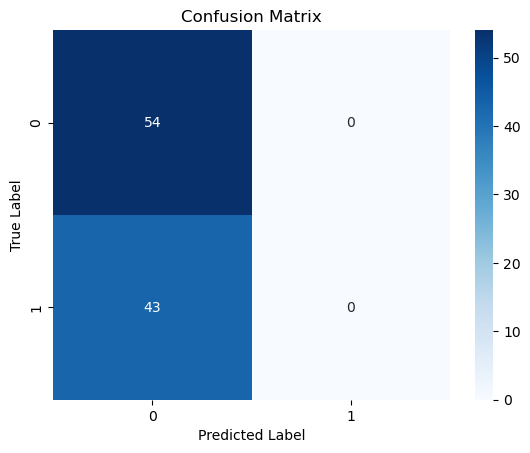

In [122]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues') 
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show();

### Save the Model

In [124]:
model.save('AppleOrangeClassifier.h5')